# <center>Graduate Rotational Internship Program</center>
## <center>The Sparks Foundation</center>

## <center>Prediction using Unsupervised ML (K-Means Clustering)</center>

## Overview and Problem Statement/Business Problems
●	From the given ‘Iris’ dataset, predict the optimum number of clusters and
represent it visually.<br>
●	Use R or Python to perform this task<br>
●	Task submission:
1.	Host the code on GitHub Repository (public). Record the code and output in a video. Post the video on YouTube
2.	Share links of code (GitHub) and video (YouTube) as a post on YOUR
LinkedIn profile
3.	Submit the LinkedIn link in Task Submission Form when shared with you.


## Approach
Based on the business problem and looking at the dataset at a high level, I will be following the below approach to solve this problem.

- Check for missing value.
- Check for outlier.
- Perform the basic EDA to find the variablity and distribution of the data.
- Use Hopkins Method to check if the dataset is good enough for a cluster analysis
- Use Silhouette and Elbow method to validate the optimal cluster values.
- Use K-Means Cluster method to build the final cluster model.

### Reading and Understanding the Data

    - Let us first import required packages and `iris` dataset.

In [1]:
# Import warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the libraries
# Importing NumPY, Pandas,Seaborn and Matplotlib for Student Score Analysis and visualization. We will import other libraries when required.
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

from sklearn import datasets

In [3]:
# Reading "iris" dataset as "df"
df = pd.read_csv('iris.csv', index_col=0)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Checking df shape
df.shape

(150, 5)

In [5]:
# Checking df columns
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
# Checking Discriptive analysis of df
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# Broadly understandig dataset Like: column types, values etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


1. Dataset has total 6 columns in which float64(4), int64(1) and object(1).
2. There is no missing values or null values.
3. 150 entries : 0 to 149 indexing.


In [8]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

- Wow we dont have any missing values. We can use .isnull() to check true or false for missing values. 
- If we are using .isnull().sum() in which we can get missing count columns wise. 

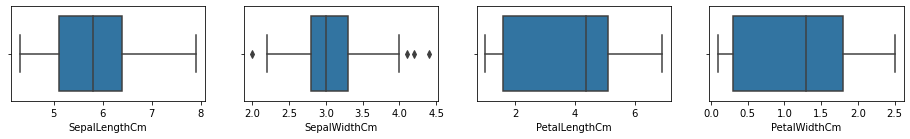

In [9]:
plt.figure(figsize=(16, 8))
plt.subplot(4, 4, 1)
sns.boxplot(df.SepalLengthCm)
plt.subplot(4, 4, 2)
sns.boxplot(df.SepalWidthCm)
plt.subplot(4, 4, 3)
sns.boxplot(df.PetalLengthCm)
plt.subplot(4, 4, 4)
sns.boxplot(df.PetalWidthCm)
plt.show()

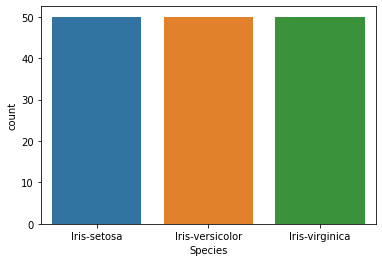

In [10]:
sns.countplot(df.Species)
plt.show()

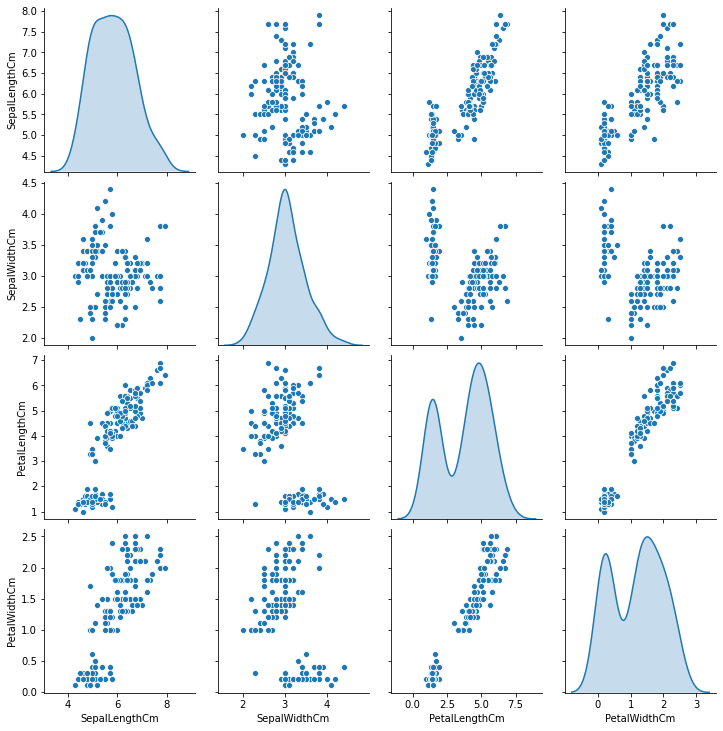

In [11]:
df_num=df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species']]

sns.pairplot(df,diag_kind='kde')


#g = sns.PairGrid(df_num)
#g.map_upper(sns.scatterplot,color='green')
#g.map_lower(sns.scatterplot, color='red')
#g.map_diag(plt.hist)

plt.show()

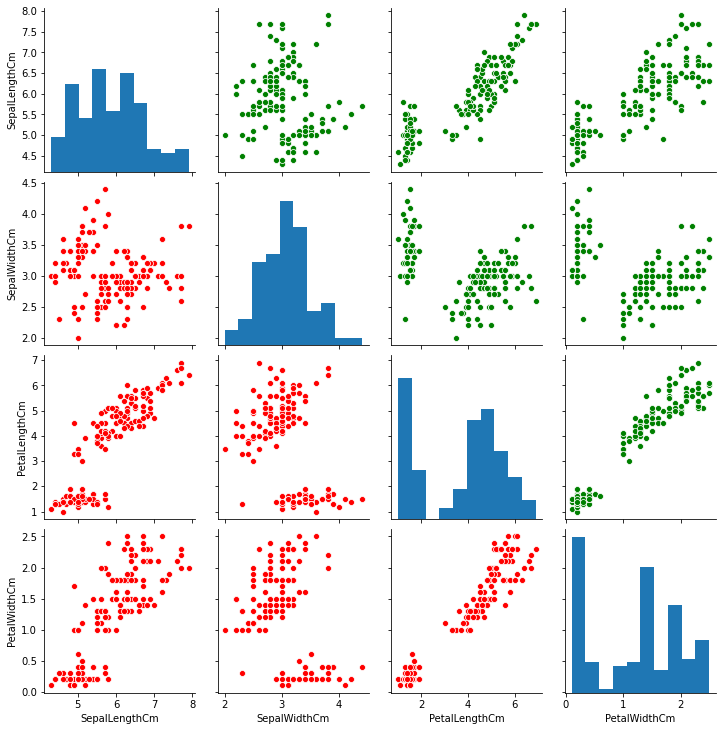

In [12]:
df_num=df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species']]

#sns.pairplot(df,diag_kind='kde')


g = sns.PairGrid(df_num)
g.map_upper(sns.scatterplot,color='green')
g.map_lower(sns.scatterplot, color='red')
g.map_diag(plt.hist)

plt.show()

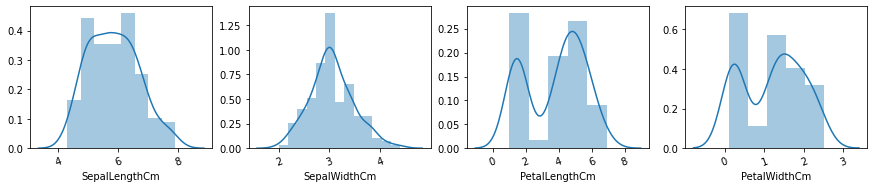

In [13]:
plt.figure(figsize=(15, 12))
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
for i in enumerate(features):
    ax = plt.subplot(4, 4, i[0]+1)
    sns.distplot(df_num[i[1]])
    plt.xticks(rotation=20)
plt.show()

In [14]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [15]:
df_new=df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].copy()

In [16]:
import sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit_transform
df_scaled = scaler.fit_transform(df_new)
df_scaled.shape

(150, 4)

In [17]:
df_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [18]:
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
df_scaled.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [19]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [20]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [21]:
#Use the Hopkins Statistic function by passing the above dataframe as a paramter
hopkins(df_scaled)

0.8393230857366873

### Insight
- Hopkins Statistic over .70 is a good score that indicated that the data is good for cluster analysis. 
- A 'Hopkins Statistic' value close to 1 tends to indicate the data is highly clustered, random data will tend to result in values around 0.5, and uniformly distributed data will tend to result in values close to 0.

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Finding the Optimal Number of Clusters
#### SSD (Elbow Curve)

In [23]:
df_scaled.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


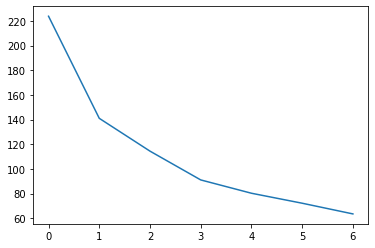

In [24]:
# elbow-curve/SSD
x = df_scaled.iloc[:, [0, 1, 2, 3]].values

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_scaled)
    
    kmeans.fit(x)
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)
plt.show()

In [25]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.580184463257396
For n_clusters=3, the silhouette score is 0.4589717867018717
For n_clusters=4, the silhouette score is 0.38686030299599405
For n_clusters=5, the silhouette score is 0.345972967262151
For n_clusters=6, the silhouette score is 0.3259022727699334
For n_clusters=7, the silhouette score is 0.35386323616060833
For n_clusters=8, the silhouette score is 0.34437349579557414


### INSIGHT : 
- From the above validations(Elbow Curve & silhouette analysis), we could see that 3,4 or 5 clusters are optimal number of clusters to be used. We will try 3 different iterations in K-Means clustering using 3,4 and 5 Clusters and analyse the results.

### K-Means Clustering
#### First Iteration - Using 3 Clusters

In [26]:
# K Means with with k=3
kmeans_3 = KMeans(n_clusters=3, max_iter=300, init='k-means++', n_init=10, random_state= 0)
y_kmeans = kmeans.fit_predict(x)

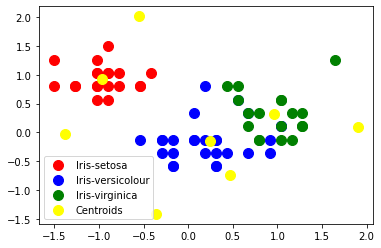

In [27]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()

## You may connect me over <a href="https://www.linkedin.com/in/roushan258/" target="_blank">LinkedIn</a> | <a href="https://github.com/Roushan93">GitHub</a>